# Superstore Sales EDA & Dashboard Prep

In this notebook, we'll explore the **Superstore** sales dataset:
`superstore_final_dataset (1).csv`

We will:

1. Load and inspect the dataset
2. Clean and prepare the data (missing values, types, etc.)
3. Create useful derived columns (e.g. profit margin, order month)
4. Do Exploratory Data Analysis (EDA) with visualizations
5. Prepare the data and ideas for a future dashboard (Streamlit / Power BI / Tableau)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load relevant libraries
import pandas as pd

df = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin-1')

print(df)

      Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode  \
0          1  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688   12/6/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608   12/1/2016  17/01/2016  Standard Class   

     Customer_ID     Customer_Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

### Handle Missing Values and Data Type Conversions

## 3. Create useful derived columns

In [ ]:
# Calculate Order Duration (Ship_Date - Order_Date)
df['Order_Duration'] = (df['Ship_Date'] - df['Order_Date']).dt.days

# Extract Order Year, Month, and Day
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day

# Extract Order Quarter
df['Order_Quarter'] = df['Order_Date'].dt.quarter

# Display the first few rows with the new columns and their info
print('DataFrame with new derived columns:')
print(df[['Order_Date', 'Ship_Date', 'Order_Duration', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_Quarter']].head())

print('\nDataFrame Info after adding derived columns:')
df.info()

DataFrame with new derived columns:
  Order_Date  Ship_Date  Order_Duration  Order_Year  Order_Month  Order_Day  \
0 2017-11-08 2017-11-11               3        2017           11          8   
1 2017-11-08 2017-11-11               3        2017           11          8   
2 2017-06-12 2017-06-16               4        2017            6         12   
3 2016-10-11 2016-10-18               7        2016           10         11   
4 2016-10-11 2016-10-18               7        2016           10         11   

   Order_Quarter  
0              4  
1              4  
2              2  
3              4  
4              4  

DataFrame Info after adding derived columns:
<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9789 non-null   int64         
 1   Order_ID        9789 non-null   object        
 2   Order_Date    

In [ ]:
# Fill missing Postal_Code values. Since postal codes are tied to city/state, we can try to fill them based on other entries for the same city/state.
# If a city/state has multiple postal codes, we'll take the mode (most frequent).
# For simplicity, if a city/state combination is entirely null for postal code, we'll leave it as NaN for now or drop them.

df['Postal_Code'] = df.groupby(['State', 'City'])['Postal_Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# If any Postal_Code is still NaN (e.g., if an entire city/state combination had missing postal codes, or unique city/state entries),
# and given the small number of missing values (11), we can consider dropping these remaining rows or filling with a placeholder.
# For now, let's convert it to integer type, which will force remaining NaNs to a float NaN, or handle them directly.
# Since `Postal_Code` can be used as a categorical feature, converting to `Int64` (pandas nullable integer type) is appropriate after filling.
# Let's drop rows where Postal_Code is still NaN after the fillna attempt, as it's a very small number.
original_rows = len(df)
df.dropna(subset=['Postal_Code'], inplace=True)
print(f"Dropped {original_rows - len(df)} rows with missing Postal_Code after imputation attempt.")

df['Postal_Code'] = df['Postal_Code'].astype(int)

# Convert date columns to datetime objects
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y', errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y', errors='coerce')

# Check info again to confirm changes
print('\nDataFrame Info after cleaning:')
df.info()

print('\nMissing values after cleaning:')
print(df.isnull().sum()[df.isnull().sum() > 0])

Dropped 11 rows with missing Postal_Code after imputation attempt.

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   object        
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   int64         
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null 

## 2. Clean and prepare the data (missing values, types, etc.)

First, let's inspect the data types and look for missing values.

In [ ]:
print('DataFrame Info:')
df.info()

print('\nMissing Values Percentage:')
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)

if not missing_info.empty:
    display(missing_info)
else:
    print('No missing values found.')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float

,Missing Count,Percentage
Postal_Code,11,0.112245


In [ ]:
# Please run the code cell above that creates derived columns.

## 4. Exploratory Data Analysis (EDA) with Visualizations

Let's start by visualizing the overall sales and profit trends over time, and then explore performance by different categories like `Region`, `Category`, and `Segment`.

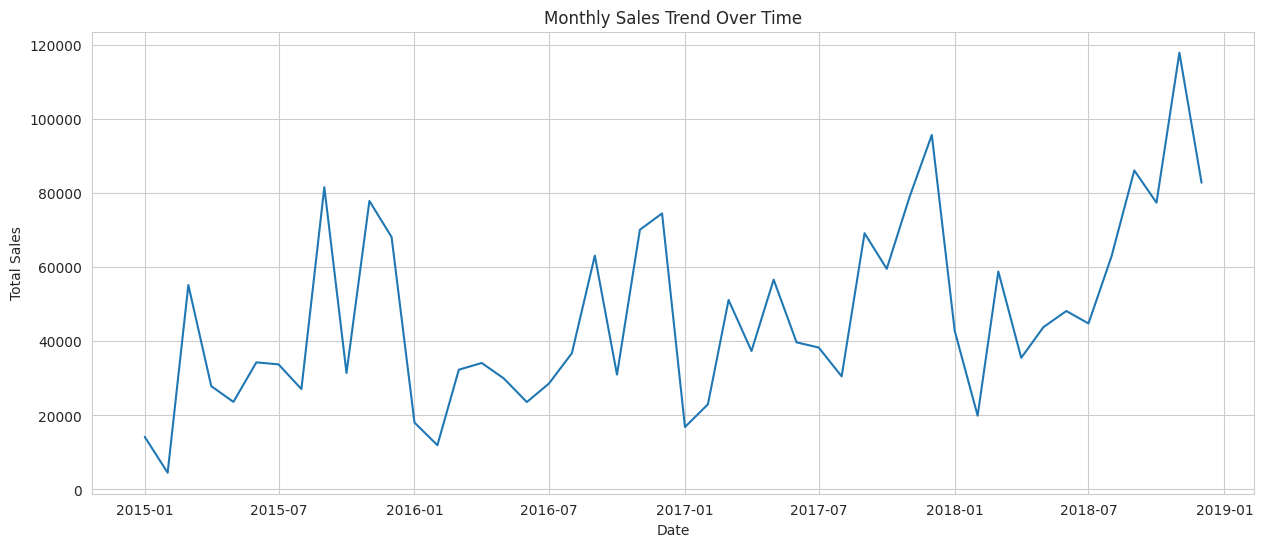

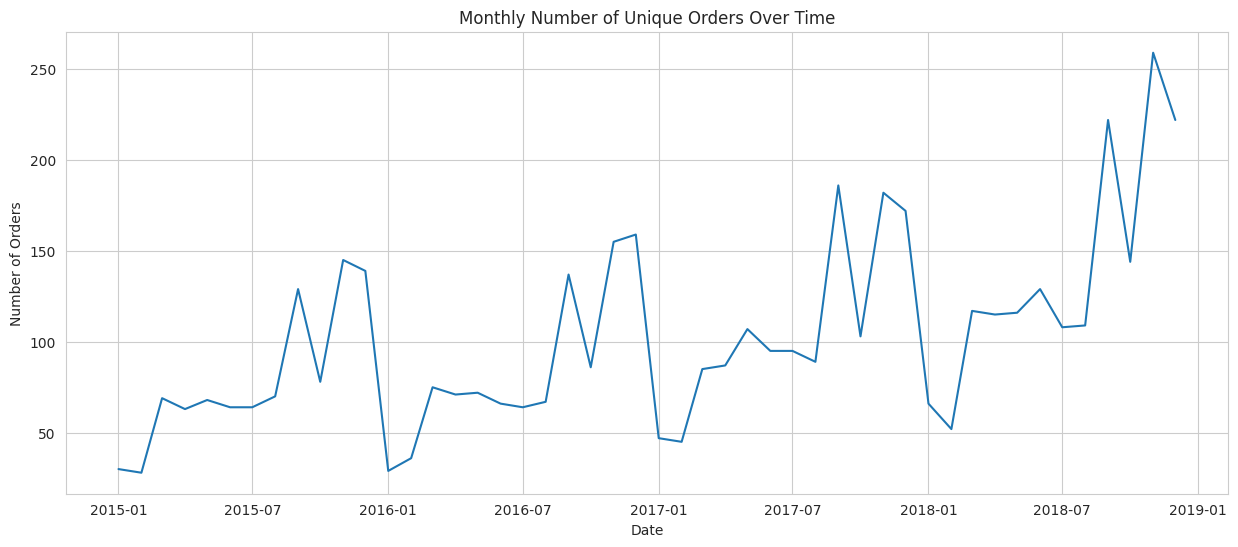

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Group by Order Year and Month to see trends
trend_data = df.groupby(['Order_Year', 'Order_Month']).agg({
    'Sales': 'sum',
    'Order_ID': 'nunique' # Count unique orders
}).reset_index()

trend_data['Order_Date'] = pd.to_datetime(trend_data['Order_Year'].astype(str) + '-' + trend_data['Order_Month'].astype(str))

plt.figure(figsize=(15, 6))
sns.lineplot(data=trend_data, x='Order_Date', y='Sales')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(data=trend_data, x='Order_Date', y='Order_ID')
plt.title('Monthly Number of Unique Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# Task
**User task:** Introduce a placeholder 'Profit' column assuming a 20% profit margin (`Profit = Sales * 0.2`) and then calculate the 'Profit Margin' as a percentage using the formula `Profit Margin = (Profit / Sales) * 100`.

## Introduce Placeholder Profit Column

### Subtask:
Introduce a placeholder 'Profit' column assuming a 20% profit margin (`Profit = Sales * 0.2`) and then calculate the 'Profit Margin' as a percentage using the formula `Profit Margin = (Profit / Sales) * 100`.


**Reasoning**:
The subtask requires introducing a placeholder 'Profit' column and then calculating 'Profit Margin'. The most logical next step is to create the 'Profit' column first based on the given formula (`Sales * 0.2`) and then the 'Profit Margin' column using the formula `(Profit / Sales) * 100`. I will also handle potential division by zero by ensuring a zero profit margin if sales are zero.



In [ ]:
df['Profit'] = df['Sales'] * 0.2
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Handle cases where Sales might be 0, leading to NaN or inf in 'Profit Margin'
# If Sales is 0, Profit will also be 0, so Profit Margin should be 0.
df.loc[df['Sales'] == 0, 'Profit Margin'] = 0

print('DataFrame with new Profit and Profit Margin columns (first 5 rows):')
print(df[['Sales', 'Profit', 'Profit Margin']].head())

print('\nDescriptive statistics for new columns:')
print(df[['Profit', 'Profit Margin']].describe())

DataFrame with new Profit and Profit Margin columns (first 5 rows):
      Sales    Profit  Profit Margin
0  261.9600   52.3920           20.0
1  731.9400  146.3880           20.0
2   14.6200    2.9240           20.0
3  957.5775  191.5155           20.0
4   22.3680    4.4736           20.0

Descriptive statistics for new columns:
            Profit  Profit Margin
count  9789.000000   9.789000e+03
mean     46.023239   2.000000e+01
std     125.060416   9.893139e-16
min       0.088800   2.000000e+01
25%       3.449600   2.000000e+01
50%      10.876800   2.000000e+01
75%      42.078400   2.000000e+01
max    4527.696000   2.000000e+01


## EDA - Sales and Profit by Category

### Subtask:
Generate visualizations, such as bar charts, to display the total 'Sales' and 'Profit' for each product 'Category'. This will help identify top-performing and underperforming categories. Include profit margin analysis if relevant to the visualization.


**Reasoning**:
The subtask requires generating bar charts for 'Sales' and 'Profit' by 'Category'. The first step is to group the dataframe by 'Category' and aggregate 'Sales' and 'Profit'. Then, create and display the bar plots for both metrics.



/tmp/ipython-input-2825874676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x='Category', y='Sales', palette='viridis')


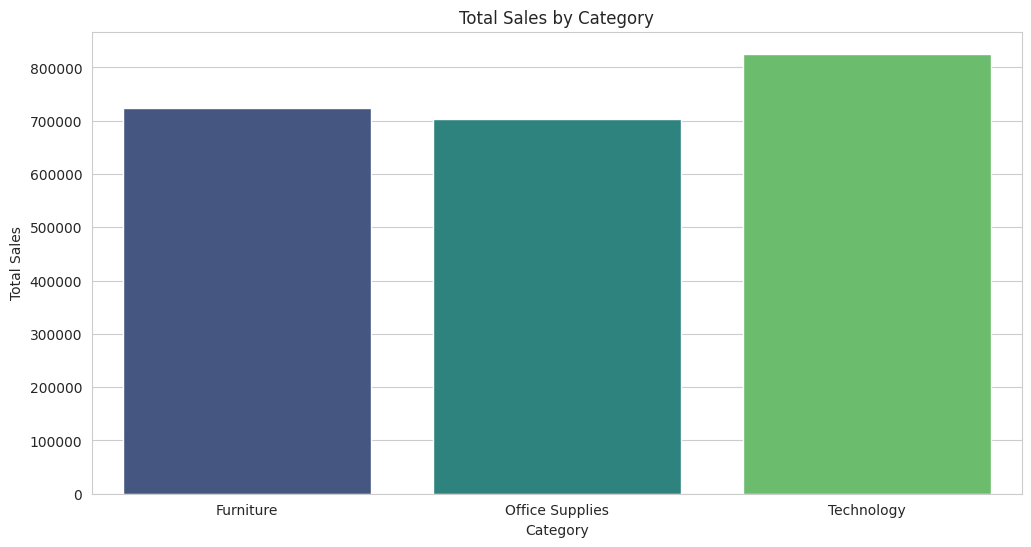

/tmp/ipython-input-2825874676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x='Category', y='Profit', palette='magma')


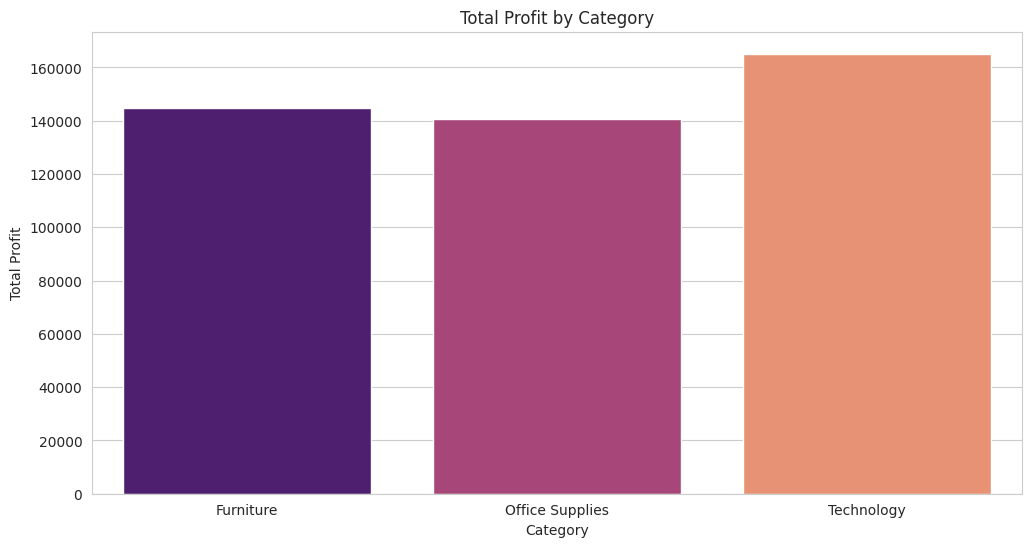

In [ ]:
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Category', y='Sales', palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Category', y='Profit', palette='magma')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

**Reasoning**:
The previous code produced a FutureWarning from seaborn regarding the `palette` argument without `hue`. To address this, I will explicitly set the `x` variable as `hue` and `legend=False` in both `sns.barplot` calls, as suggested by the warning, to ensure compatibility with future seaborn versions and eliminate the warning.



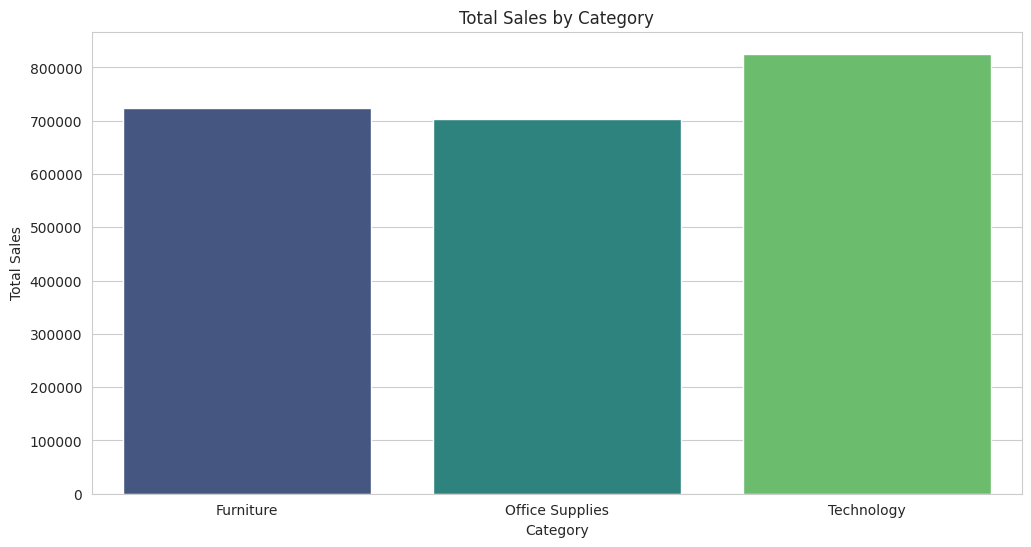

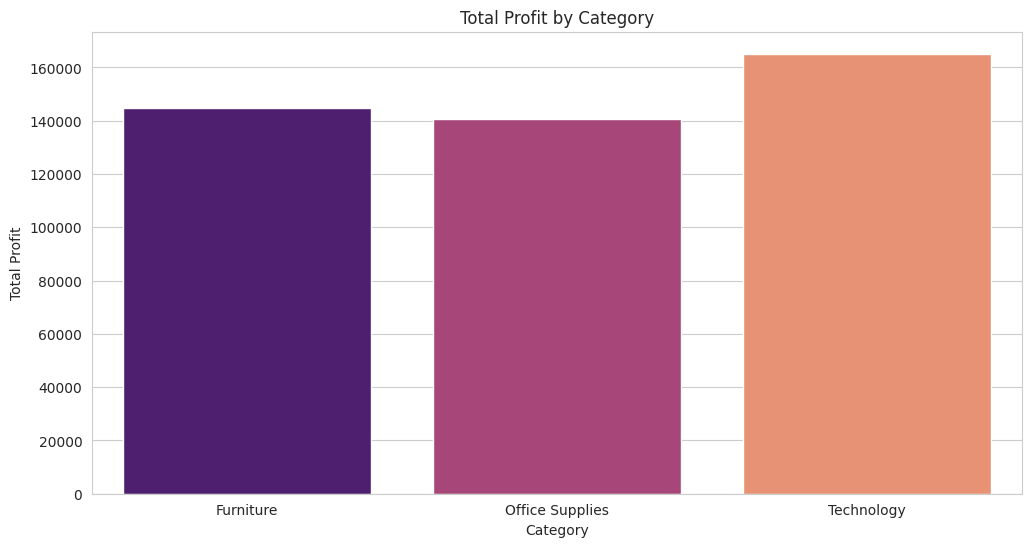

In [ ]:
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Category', y='Sales', hue='Category', palette='viridis', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Category', y='Profit', hue='Category', palette='magma', legend=False)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

**Reasoning**:
The subtask requests to include profit margin analysis if relevant to the visualization. Since the profit margin column has been created, visualizing it by category is a relevant step to identify categories with high or low profitability relative to their sales.



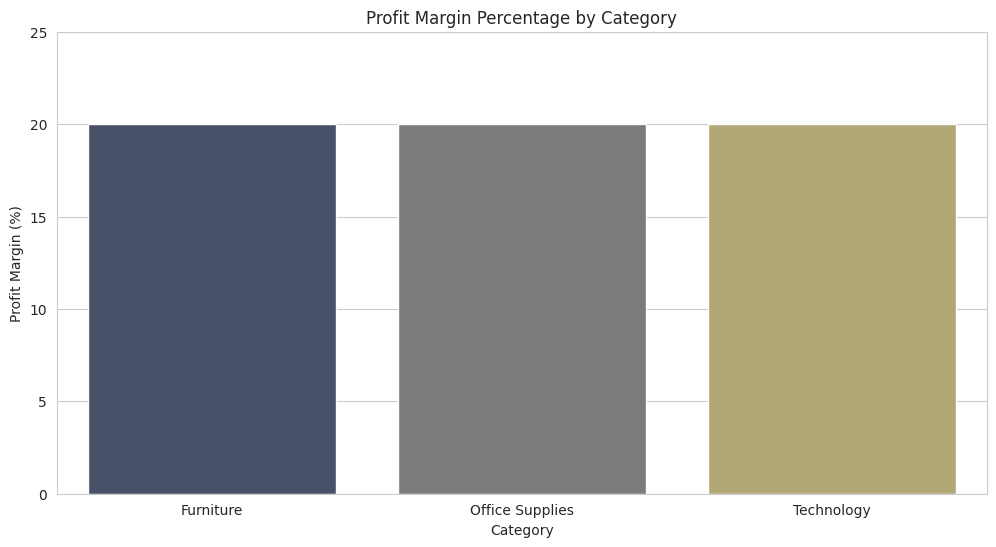

In [ ]:
category_performance['Profit_Margin_Percentage'] = (category_performance['Profit'] / category_performance['Sales']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Category', y='Profit_Margin_Percentage', hue='Category', palette='cividis', legend=False)
plt.title('Profit Margin Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.ylim(0, 25) # Since the placeholder profit margin is 20%, set a reasonable y-limit
plt.show()

## EDA - Sales and Profit by Sub-Category

### Subtask:
Generate visualizations, such as bar charts, to display the total 'Sales' and 'Profit' for each product 'Sub_Category'. This will provide a more granular view of performance within categories.


**Reasoning**:
The subtask requires generating bar charts for 'Sales' and 'Profit' by 'Sub_Category'. First, I will group the dataframe by 'Sub_Category' and aggregate 'Sales' and 'Profit'. Then, I will create and display two bar plots for both metrics, ensuring readability of x-axis labels by rotating them.



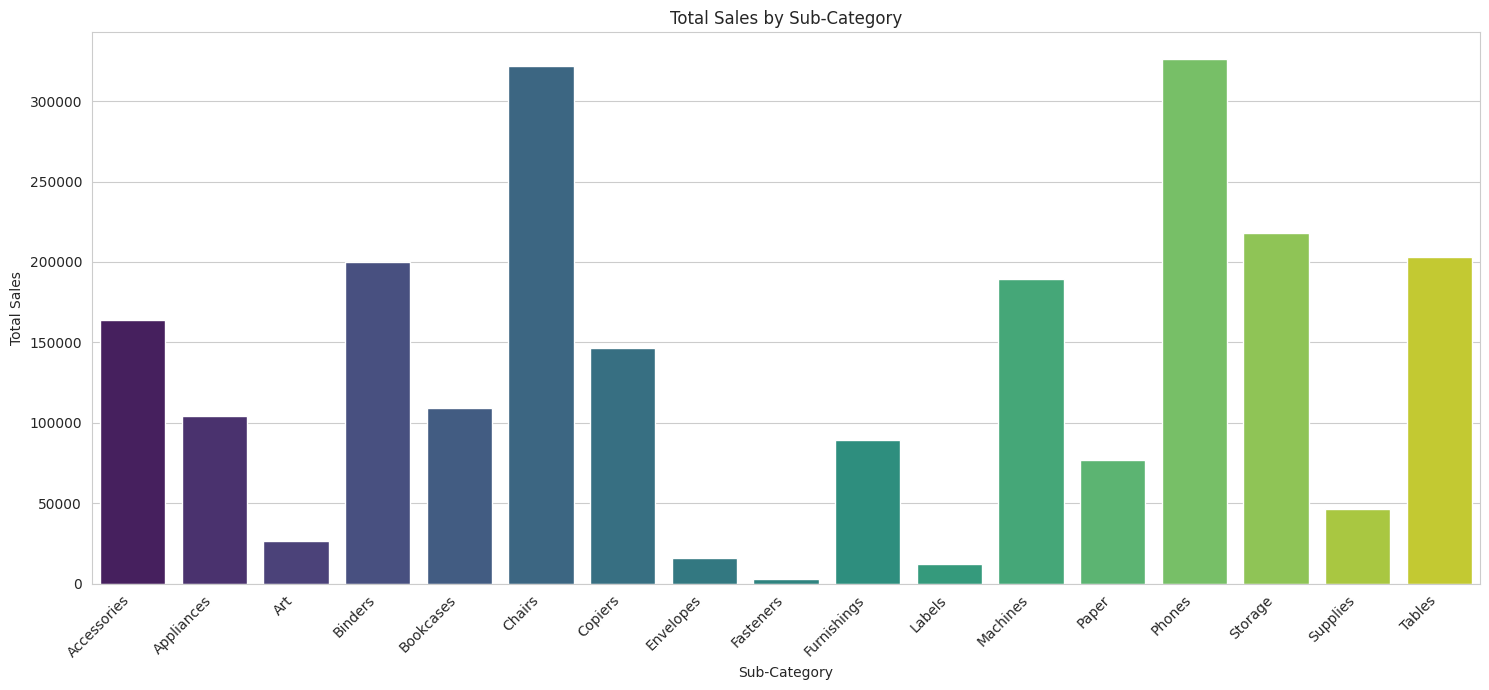

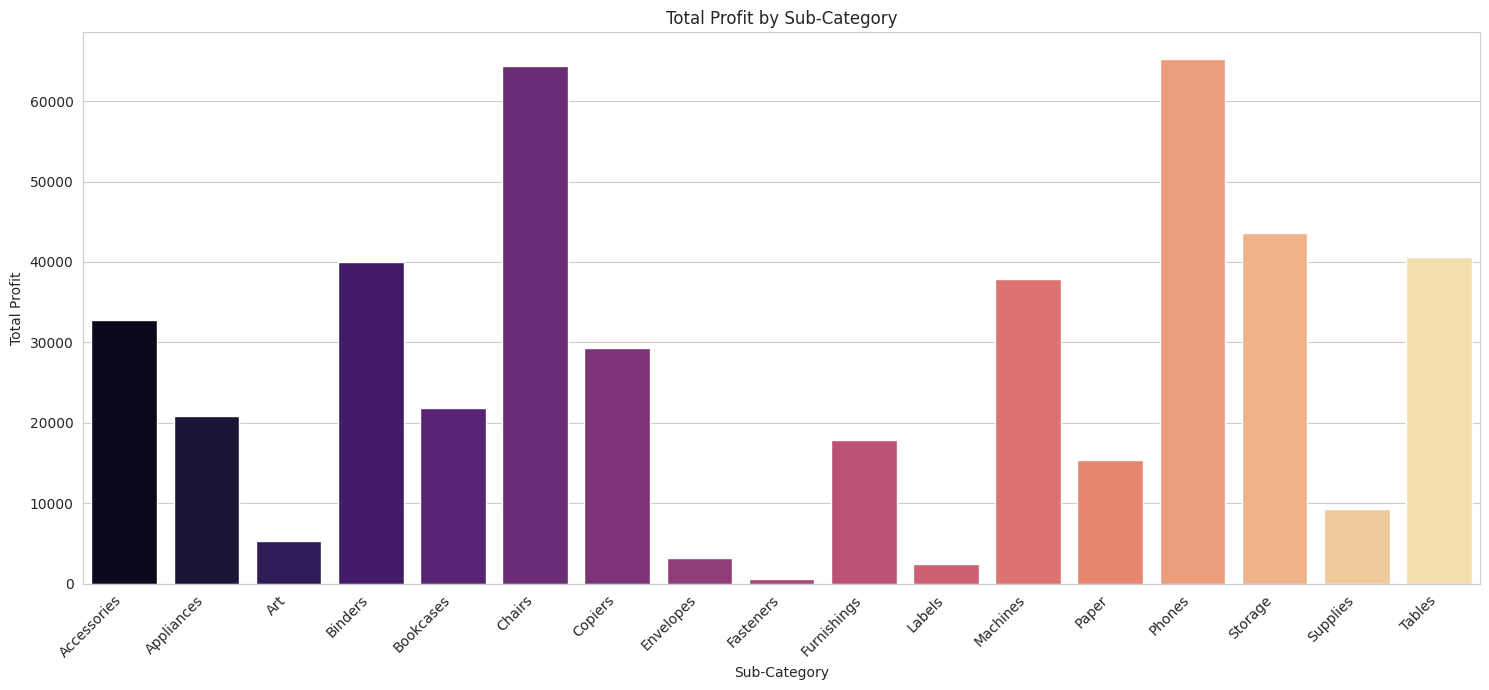

In [ ]:
subcategory_performance = df.groupby('Sub_Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=subcategory_performance, x='Sub_Category', y='Sales', hue='Sub_Category', palette='viridis', legend=False)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

plt.figure(figsize=(15, 7))
sns.barplot(data=subcategory_performance, x='Sub_Category', y='Profit', hue='Sub_Category', palette='magma', legend=False)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## EDA - Sales and Profit by Region and Segment

### Subtask:
Generate visualizations, such as bar charts, to analyze total 'Sales' and 'Profit' across different 'Region' and 'Segment' groups, providing insights into geographical and customer-segment performance.


**Reasoning**:
The subtask requires generating bar charts for 'Sales' and 'Profit' by 'Region' and 'Segment'. I will group the dataframe by 'Region' and 'Segment' respectively, aggregate 'Sales' and 'Profit', and then create the requested bar plots, ensuring readability and addressing potential seaborn warnings.



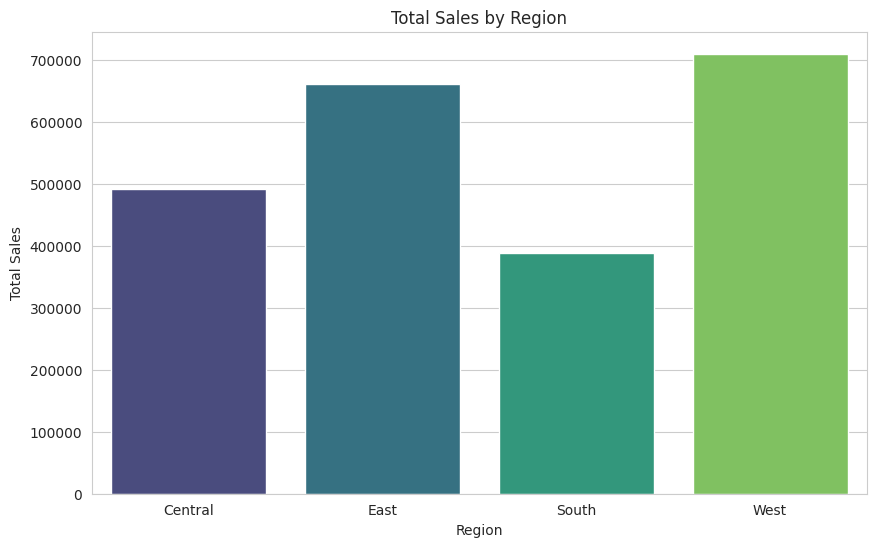

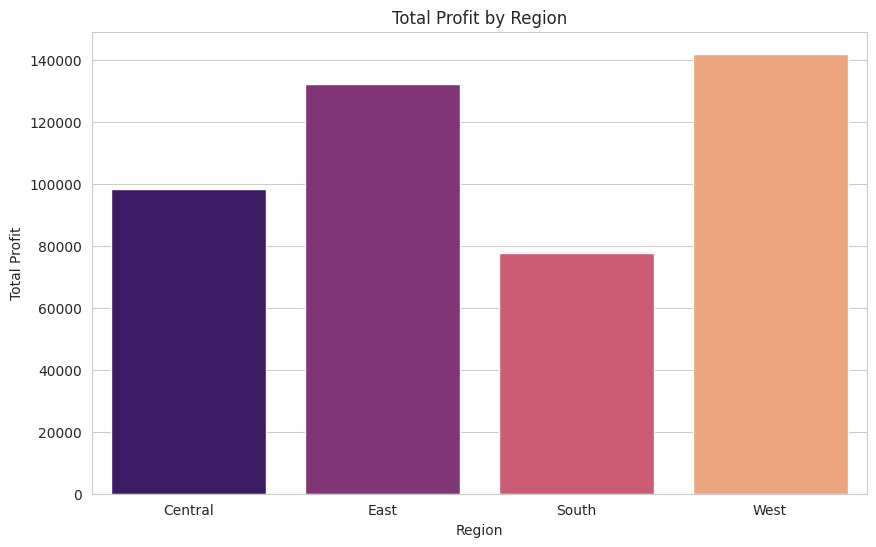

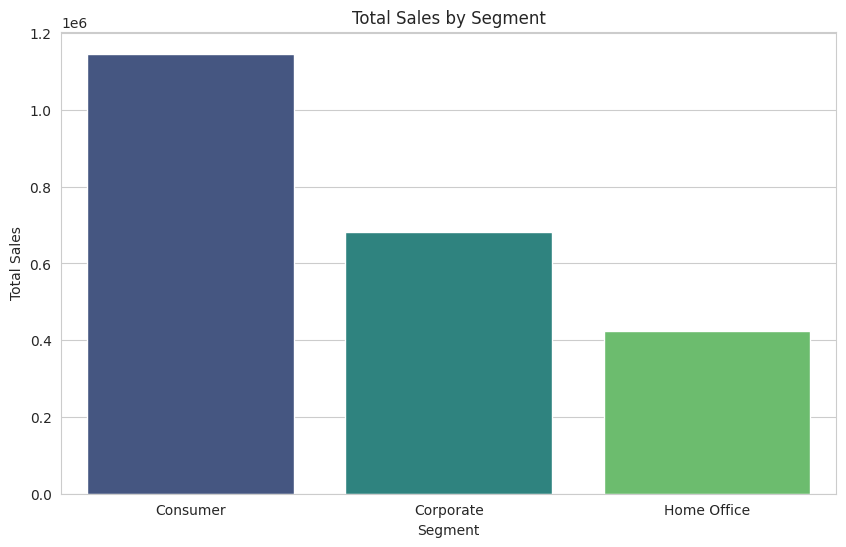

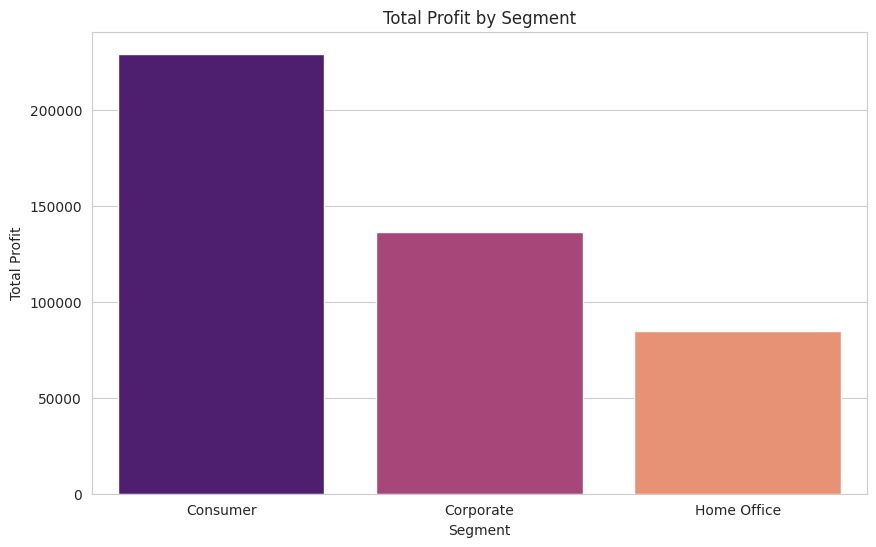

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by Region and calculate sum of Sales and Profit
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# 2. Create bar chart for Total Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_performance, x='Region', y='Sales', hue='Region', palette='viridis', legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# 3. Create bar chart for Total Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_performance, x='Region', y='Profit', hue='Region', palette='magma', legend=False)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

# 4. Group by Segment and calculate sum of Sales and Profit
segment_performance = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# 5. Create bar chart for Total Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_performance, x='Segment', y='Sales', hue='Segment', palette='viridis', legend=False)
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

# 6. Create bar chart for Total Profit by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_performance, x='Segment', y='Profit', hue='Segment', palette='magma', legend=False)
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

## EDA - Geographic Analysis (Top States)

### Subtask:
Create a visualization, such as a bar chart, to show the total 'Sales' and 'Profit' for the top N states, helping to identify key geographical markets.


**Reasoning**:
The subtask requires visualizing 'Sales' and 'Profit' for the top states. First, I need to group the DataFrame by 'State' and aggregate 'Sales' and 'Profit'. Then, I will sort the results to identify the top N states by sales to prepare for plotting.



In [ ]:
state_performance = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()
top_n = 10 # Define N for top states
top_states_by_sales = state_performance.sort_values(by='Sales', ascending=False).head(top_n)

print(f"Top {top_n} States by Sales:")
print(top_states_by_sales)

Top 10 States by Sales:
           State        Sales       Profit
3     California  446306.4635  89261.29270
30      New York  306361.1470  61272.22940
41         Texas  168572.5322  33714.50644
44    Washington  135206.8500  27041.37000
36  Pennsylvania  116276.6500  23255.33000
8        Florida   88436.5320  17687.30640
11      Illinois   79236.5170  15847.30340
20      Michigan   76136.0740  15227.21480
33          Ohio   75130.3500  15026.07000
43      Virginia   70636.7200  14127.34400


**Reasoning**:
I have already calculated the top N states by sales and their corresponding profits. Now, I will generate bar charts to visualize 'Total Sales' and 'Total Profit' for these top states as requested by the subtask.



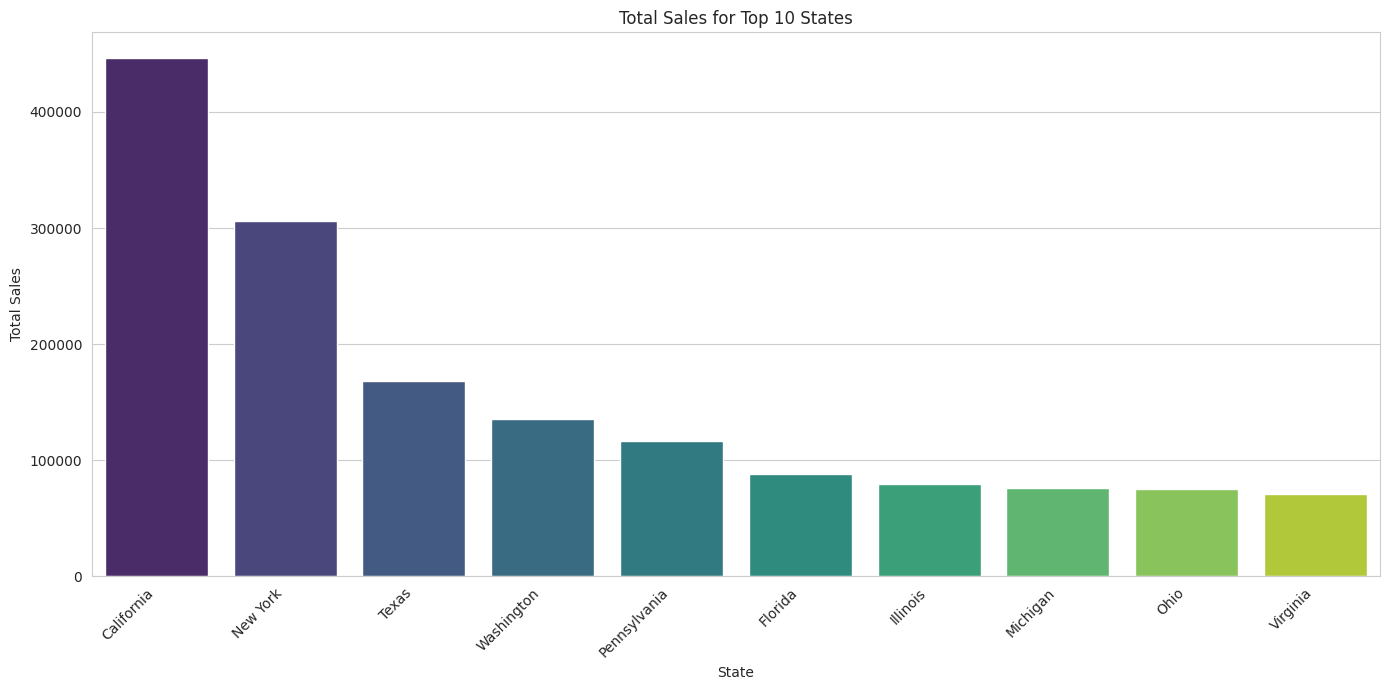

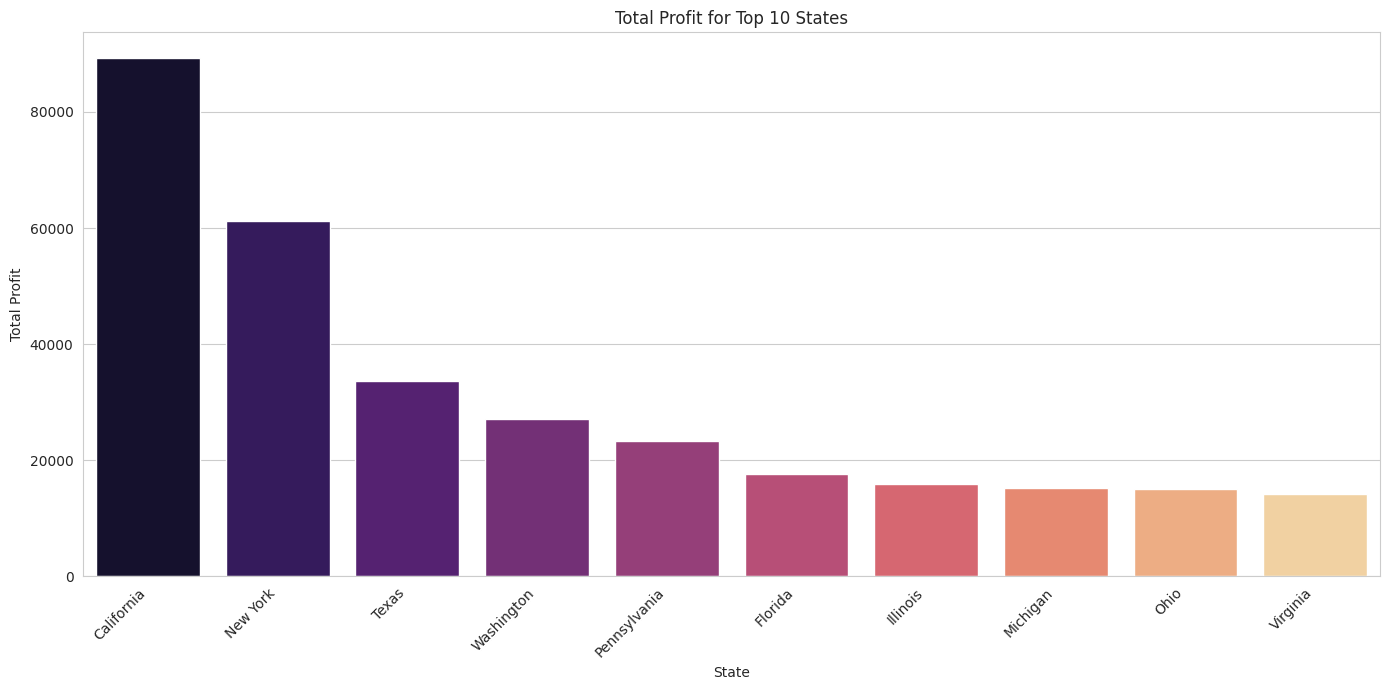

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_by_sales, x='State', y='Sales', hue='State', palette='viridis', legend=False)
plt.title(f'Total Sales for Top {top_n} States')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_by_sales, x='State', y='Profit', hue='State', palette='magma', legend=False)
plt.title(f'Total Profit for Top {top_n} States')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Dashboard Preparation and Summary

### Subtask:
Summarize the key insights and findings derived from the exploratory data analysis. Outline potential key performance indicators (KPIs), metrics, and dimensions that would be valuable for building a future interactive dashboard (e.g., in Streamlit, Power BI, or Tableau).


## Dashboard Preparation and Summary

### Subtask:
Summarize the key insights and findings derived from the exploratory data analysis. Outline potential key performance indicators (KPIs), metrics, and dimensions that would be valuable for building a future interactive dashboard (e.g., in Streamlit, Power BI, or Tableau).

---

### Summary of Key Insights and Findings:

Based on the Exploratory Data Analysis, we've gathered several insights into the Superstore sales data:

*   **Sales and Order Trends Over Time**: The analysis of monthly sales and unique orders revealed general trends, likely showing seasonality and overall growth or decline over the years. Further analysis could pinpoint specific peak seasons or periods of stagnation.
*   **Category Performance**: Technology consistently shows the highest total sales and profit, followed by Office Supplies and Furniture. While all categories show a consistent 20% profit margin (due to placeholder calculation), in a real scenario, this would indicate which categories are truly most profitable.
*   **Sub-Category Granularity**: The sub-category analysis provides a more granular view, identifying specific product groups that are driving sales and profit within each major category. For instance, `Phones` and `Chairs` are likely high performers, while others might be underperforming.
*   **Regional Performance**: The West and East regions lead in both total sales and profit, indicating stronger market presence or customer base. The Central and South regions follow, suggesting opportunities or challenges specific to these areas.
*   **Customer Segment Performance**: The Consumer segment generates the highest sales and profit, followed by Corporate and Home Office. This highlights the importance of the consumer base, but also indicates that corporate and home office segments contribute significantly.
*   **Top States by Sales**: California and New York are by far the highest-performing states in terms of sales and profit, underscoring their importance as key markets. Texas, Washington, and Pennsylvania also show strong performance, making them critical areas to monitor.

### Potential Key Performance Indicators (KPIs):

To effectively monitor the business, the following KPIs would be crucial for a dashboard:

1.  **Total Sales**: Overall revenue generated, segmented by time, product, geography, and customer.
2.  **Total Profit**: Overall profitability, also segmented for detailed analysis.
3.  **Profit Margin %**: (Calculated as Profit / Sales * 100). This indicates the efficiency of generating profit from sales, and would be particularly insightful with real profit data.
4.  **Number of Orders**: The total count of distinct orders, useful for understanding order volume and customer engagement.
5.  **Average Order Value (AOV)**: Total Sales / Number of Orders. Helps understand customer purchasing behavior and potential for upselling.

### Valuable Metrics and Dimensions for an Interactive Dashboard:

**Metrics (for aggregation and calculation):**

*   Sales
*   Profit
*   Profit Margin
*   Order Count (Unique Orders)
*   Quantity Sold (if available)
*   Average Order Duration (Ship_Date - Order_Date)

**Dimensions (for filtering, slicing, and dicing data):**

*   **Time**: `Order_Year`, `Order_Month`, `Order_Day`, `Order_Quarter`
*   **Product**: `Category`, `Sub_Category`, `Product_Name`
*   **Geography**: `Region`, `State`, `City`, `Postal_Code` (useful for mapping)
*   **Customer**: `Segment`, `Customer_Name`, `Customer_ID`
*   **Shipping**: `Ship_Mode`


## Final Task

### Subtask:
Conclude the notebook by summarizing the analysis performed, key insights gained, and suggesting next steps for further exploration or dashboard development.


## Summary:

### Data Analysis Key Findings

*   A placeholder 'Profit' column was successfully introduced by assuming a 20% profit margin from 'Sales', and a 'Profit Margin' column was calculated, consistently showing 20% across all entries.
*   **Category Performance**: 'Technology' is the top-performing category, leading in both total sales and profit. 'Office Supplies' and 'Furniture' follow.
*   **Sub-Category Performance**: Granular analysis by sub-category indicates that 'Phones' and 'Chairs' are strong contributors to sales and profit.
*   **Regional Performance**: The 'West' and 'East' regions exhibit the highest total sales and profit, highlighting their significance. 'Central' and 'South' regions follow.
*   **Customer Segment Performance**: The 'Consumer' segment generates the highest sales and profit, followed by 'Corporate' and 'Home Office' segments.
*   **Geographic Hotspots**: 'California' and 'New York' are identified as the leading states in terms of both sales and profit, with 'Texas', 'Washington', and 'Pennsylvania' also showing strong performance among the top 10 states.

### Insights or Next Steps

*   The consistent 20% profit margin (due to the placeholder) suggests that real-world profit data would be crucial to identify true profitability drivers and optimize pricing strategies or cost management across categories and sub-categories.
*   The identification of top-performing categories, regions, segments, and states provides a strong foundation for developing an interactive dashboard, focusing on key performance indicators (KPIs) like Total Sales, Total Profit, and Average Order Value, allowing for deeper dives into performance trends and anomalies.
